In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
%matplotlib inline

\begin{equation}
    f(x) = (x_1 + x_2)^4 + \left(\frac{x_1-x_2}{2}\right)^4
\end{equation}

の最小値を求める

従来のGradient descentは、$f(x)$の一階微分   
\begin{eqnarray}
    \frac{\partial f(x)}{\partial x_1} &=& 4(x_1 + x_2)^3 + 2 \left(\frac{x_1-x_2}{2}\right)^3　　\\
    \frac{\partial f(x)}{\partial x_2} &=& 4(x_1 + x_2)^3 - 2 \left(\frac{x_1-x_2}{2}\right)^3
\end{eqnarray}
をつかって, $x_{i+1} \leftarrow x_i - \alpha\,{\rm grad}\,f(x_i)$を行う。

In [2]:
x1 = np.arange(-1,5,0.001) 
x2 = np.arange(-5,1,0.01) 
X1,X2 = np.meshgrid(x1,x2)
def func(x1,x2):
    return (x1+x2)**4 + (x1/2. - x2/2.)**4
Z = func(X1,X2)

\begin{equation}
    f(x) = (x_1 + x_2)^4 + \left(\frac{x_1-x_2}{2}\right)^4
\end{equation}
の関数表示

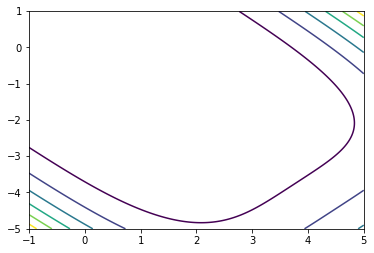

In [3]:
plt.figure()
plt.contour(X1,X2,Z)
plt.show()

gradient descentを試す。

In [4]:
iter_x1 = [1] 
iter_x2 = [-6]
alpha = 0.001
def gradf(x1,x2,alpha):
    retx1 = x1-alpha*(4*(x1 + x2)**3 + 2*((x1-x2)/2.)**3)
    retx2 = x2-alpha*(4*(x1 + x2)**3 - 2*((x1-x2)/2.)**3)
    return retx1,retx2

for i in range(1000):
    tempx1,tempx2 = gradf(iter_x1[i],iter_x2[i],alpha)
    iter_x1.append(tempx1)
    iter_x2.append(tempx2)

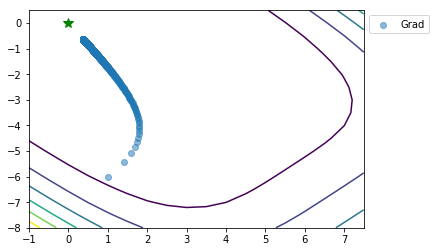

In [5]:
x1 = np.arange(-1,8,0.5) 
x2 = np.arange(-8,1,0.5) 
X1,X2 = np.meshgrid(x1,x2)
Z = func(X1,X2)
plt.figure()
plt.contour(X1,X2,Z)
plt.scatter(iter_x1,iter_x2,label='Grad',alpha=0.5)
plt.plot(0,0,'*',color='g',markersize=10)
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

kinemaは,
\begin{eqnarray}
    k(p) = \frac{3}{4}(p_1^{4/3} + p_2^{4/3})
\end{eqnarray}
と求まる.

$k(p)$は、$f^*(p) = \max(xp-f(x))$,$k(p) = (f^*(-p)+f^*(p))/2$
で求める。

定常状態のハミルトニアン$H({\bf x},{\bf p},t)$は、
\begin{eqnarray}
    H({\bf x},{\bf p},t) = f({\bf x}) + k({\bf p})
\end{eqnarray}
と表される。
正準共役な関係
\begin{eqnarray}
    {\bf \dot{x}} = \frac{\partial H({\bf x},{\bf p},t)}{\partial {\bf p}} ,  {\bf \dot{p}} = - \frac{\partial H({\bf x},{\bf p},t)}{\partial {\bf x}}
\end{eqnarray}

運動する粒子$({\bf x},{\bf p})$の$\Delta t$秒後の位置と運動量は、次のように表せる。   
${\bf x}_{i+1} \leftarrow {\bf x}_i + \Delta t \nabla k({\bf p}_i)$   
${\bf p}_{i+1} \leftarrow {\bf p}_i - \Delta t \nabla f({\bf x}_i)$

全エネが系から散逸していく場合の式は、   
$\Delta t$のエネルギー散逸分を加えて、   
$x_{i+1} \leftarrow x_i + \Delta t \nabla k(p_i)$   
$p_{i+1} \leftarrow p_i - \Delta t \nabla f(x_i) - \Delta t\gamma p_i$

In [6]:
H_iter_x1 = [1] 
H_iter_x2 = [-6]
H_iter_p1 = [0]
H_iter_p2 = [0]
def updater(x1,x2,p1,p2,delta_t,gamma):
    temp_x1 = x1 + delta_t*(p1)
    temp_x2 = x2 + delta_t*(p2)
    temp_p1 = (1-delta_t*gamma)*p1 - delta_t*(4*(temp_x1 + temp_x2)**3 + 2*((temp_x1-temp_x2)/2.)**3)
    temp_p2 = (1-delta_t*gamma)*p2 - delta_t*(4*(temp_x1 + temp_x2)**3 - 2*((temp_x1-temp_x2)/2.)**3)
    return temp_x1,temp_x2,temp_p1,temp_p2

for i in range(1000):
    tempx1,tempx2,tempp1,tempp2 = updater(H_iter_x1[i],H_iter_x2[i],H_iter_p1[i],H_iter_p2[i],delta_t=0.001,gamma=2)
    H_iter_x1.append(tempx1)
    H_iter_x2.append(tempx2)
    H_iter_p1.append(tempp1)
    H_iter_p2.append(tempp2)

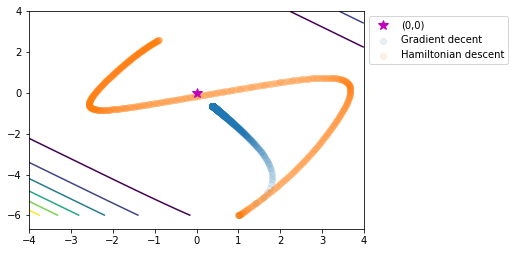

In [7]:
x1 = np.arange(-4,4,0.01) 
x2 = np.arange(-6,4,0.01) 
X1,X2 = np.meshgrid(x1,x2)
Z = func(X1,X2)
plt.figure()
plt.contour(X1,X2,Z)
plt.scatter(iter_x1,iter_x2,label='Gradient decent',alpha =0.1)
plt.scatter(H_iter_x1,H_iter_x2,label='Hamiltonian descent',alpha = 0.1)
plt.plot(0,0,'*',markersize=10,color='m',label='(0,0)')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

うまくいってる？    
$\gamma$の取り方によっては、周期減衰したり、過減衰、不足減衰したりするはず。   
たぶん、論文にその臨界減衰定数の出し方が書かれてるはず。    
エネルギー減衰量を一定だけれども、振動させながら減衰させるとかすると、変なlocal minimumへ落ちた時でも抜け出せるのかも。

In [8]:
f_1grad = []
for i in zip(iter_x1,iter_x2):
    f_1grad.append(func(i[0],i[1]))
f_HD = []
for i in zip(H_iter_x1,H_iter_x2):
    f_HD.append(func(i[0],i[1]))

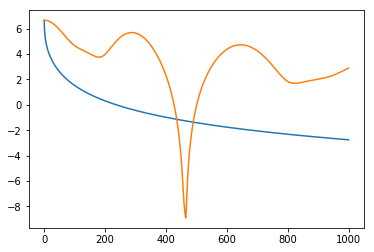

In [9]:
plt.figure()
plt.plot(np.log(f_1grad))
plt.plot(np.log(f_HD))
plt.show()

論文でも見て取れるように、   
ある一定のiterationまではGradient dscent Methodの方が早く収束している。   

論文のp2で見てとれるほどきれいに収束しないのは、パラメタ選びのせい？   
論文のどこかに書いてあるはず…

チェックとして相空間のプロット

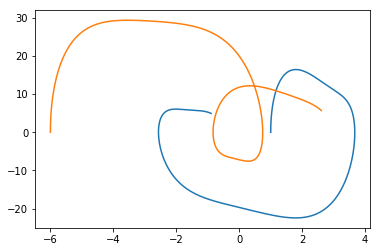

In [10]:
plt.figure()
plt.plot(H_iter_x1,H_iter_p1)
plt.plot(H_iter_x2,H_iter_p2)
plt.show()

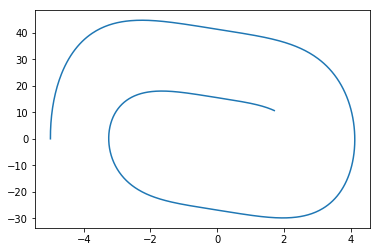

In [11]:
plt.figure()
plt.plot(np.array(H_iter_x1)+np.array(H_iter_x2),np.array(H_iter_p1)+np.array(H_iter_p2))
plt.show()

相空間上でだんだんエネルギーが抜けている絵は合ってる…

コードミス発見！

実装してたのは、2nd explicit methodだった。   
論文のp2は, 1st explicit method

# 論文2pの絵の再現

\begin{equation}
    f(x) = (x_1 + x_2)^4 + \left(\frac{x_1-x_2}{2}\right)^4
\end{equation}

kinemaは,
\begin{eqnarray}
    k(p) = \frac{3}{4}(p_1^{4/3} + p_2^{4/3})
\end{eqnarray}
または、
\begin{eqnarray}
    k(p) = \frac{p_1^{2} + p_2^{2}}{2}
\end{eqnarray}
論文では, $k(p) = \frac{p_1^{2} + p_2^{2}}{2}$を使ってるっぽい　　

1st explicit methodでは、   
$p_{i+1} \leftarrow (1 + \Delta t \gamma)^{-1}( p_i - \nabla f(x_i)\Delta t)$   
$x_{i+1} \leftarrow x_i + \Delta t \nabla k(p_{i+1})$   


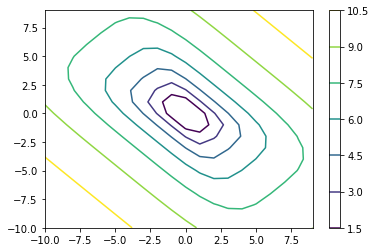

In [12]:
x1 = np.arange(-10,10,1) 
x2 = np.arange(-10,10,1) 
X1,X2 = np.meshgrid(x1,x2)
Z = func(X1,X2)
plt.figure()
plt.contour(X1,X2,np.log(Z+1))
plt.colorbar()
plt.show()

\begin{equation}
    f(x) = (x_1 + x_2)^4 + \left(\frac{x_1-x_2}{2}\right)^4
\end{equation}

In [13]:
def f(x):
    return (x[0]+x[1])**4 + (x[0]/2-x[1]/2)**4

In [14]:
def k(p,para):
    return np.sum(p**para)/para

In [15]:
def grad_f(x):
    temp_x1 = 4*((x[0]+x[1])**3) + 2*((x[0]/2-x[1]/2)**3)
    temp_x2 = 4*((x[0]+x[1])**3) - 2*((x[0]/2-x[1]/2)**3)
    return np.array([temp_x1,temp_x2])

def updater_grad(x,delta_t):
    temp_x1 = x[0] - delta_t*grad_f(x)[0]
    temp_x2 = x[1] - delta_t*grad_f(x)[1]
    return np.array([temp_x1,temp_x2])

def updater_1st(x,p,delta_t,gamma):
    temp_p1 = p[0]/(1+delta_t*gamma) - delta_t*grad_f(x)[0]/(1+delta_t*gamma)
    temp_p2 = p[1]/(1+delta_t*gamma) - delta_t*grad_f(x)[1]/(1+delta_t*gamma)
    temp_x1 = x[0] + delta_t*temp_p1
    temp_x2 = x[1] + delta_t*temp_p2
    return np.array([temp_x1,temp_x2]),np.array([temp_p1,temp_p2])

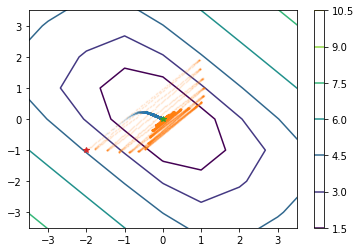

In [16]:
x1 = np.arange(-10,10,1) 
x2 = np.arange(-10,10,1) 
X1,X2 = np.meshgrid(x1,x2)
Z = func(X1,X2)

x=np.array([-2.,-1.])
p=np.array([0,0])

x_g = [x]
x_h = [x]
p_h = [p]

for i in range(50000):
    x_g.append(updater_grad(x_g[i],delta_t=0.005))
    x_tmp,p_tmp = updater_1st(x_h[i],p_h[i],delta_t=0.005,gamma=0.3)
    x_h.append(x_tmp)
    p_h.append(p_tmp)

plt.figure()
plt.contour(X1,X2,np.log(Z+1))
plt.plot(np.array(x_g)[:,0],np.array(x_g)[:,1],'o',markersize=1,alpha=0.1,label='grad descent')
plt.plot(np.array(x_h)[:,0],np.array(x_h)[:,1],'o',markersize=1,alpha=0.1,label='1st explicit')
plt.plot(0,0,'*',label='(0,0)')
plt.plot(x[0],x[1],'*',label='init')
plt.colorbar()
plt.xlim([-3.5,3.5])
plt.ylim([-3.5,3.5])
plt.show()

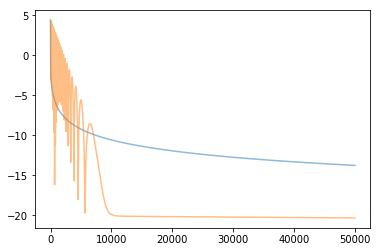

In [17]:
plt.figure()
plt.plot([np.log(f(x)) for x in x_g],alpha=0.5)
plt.plot([np.log(f(x)) for x in x_h],alpha=0.5)
plt.show()

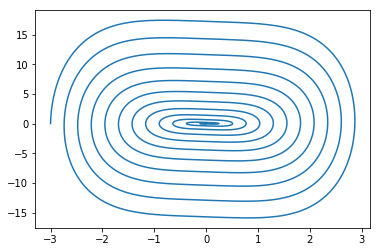

In [18]:
plt.figure()
plt.plot([np.sum(x) for x in x_h],[np.sum(x) for x in p_h])
plt.show()

問題は、k(p)の見つけ方。    
ルジャンドル変換して、k(p)を定義するのはわかったけど、現実問題そうほいほい変換できるものじゃない気がする…